Mini Projeto da Disciplina Aprendizado de Máquina

Aluno: William Gabriel da Paz Rosendo

Matrícula: 2025100304

In [ ]:
# @title Imports
!pip install -q numpy pandas scikit-learn xgboost shap lime matplotlib seaborn imbalanced-learn

import shap
import lime
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.inspection import permutation_importance
from lime.lime_tabular import LimeTabularExplainer

#Atividade
Desenvolva, usando a biblioteca Scikit-Learn (ou alguma similar, de sua escolha), um Sistema de Predição para resolver um problema relativamente complexo, considererando alguma base de dados em repositórios, tais como: Kaggle ou UCI, ou eventualmente uma outra fonte, em uma das áreas seguintes:

* Educação: (Ex.: Predict students’ dropout
and academic success),
* Saúde: (Ex.: diabetes ou outra base no Kaggle),
* Gestão de risco em projetos de software, informando entre risco alto, moderado e baixo (procurar
uma base de dados).

Como parte da documentação da solução, apresente a descrição do problema a ser resolvido,
indicando claramente os objetivos da aplicação, a especificação da base de dados, cumprindo as
etapas seguintes: preparação de dados (análise exploratória e pré-processamento de dados):

## Descrição do Problema

### Objetivo da Aplicação
Desenvolver um sistema de predição capaz de classificar se um paciente tem ou não diabetes com base em atributos presentes no Diabetes Dataset do Kaggle. O modelo visa auxiliar profissionais de saúde na detecção precoce de diabetes, permitindo intervenções preventivas.

### Especificação da Base de Dados
Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo é prever, com base em medições diagnósticas, se um paciente tem diabetes.

Diversas restrições foram impostas à seleção desses casos a partir de um banco de dados maior. Em particular, todas as pacientes são mulheres com pelo menos 21 anos de idade e de ascendência indígena Pima. As features incluem:

* **Pregnancies:** Número de vezes que esteve grávida
* **Glucose:** Concentração de glicose plasmática após 2 horas em um teste oral de tolerância à glicose
* **BloodPressure:** Pressão arterial diastólica (mm Hg)
* **SkinThickness:** Espessura da prega cutânea do tríceps (mm)
* **Insulin:** Insulina sérica de 2 horas (mu U/ml)
* **BMI:** Índice de massa corporal (peso em kg/(altura em m)²)
* **DiabetesPedigreeFunction:** Função que avalia risco de diabetes baseado em histórico familiar
* **Age:** Idade em anos
* **Outcome:** Variável target (0 = não diabético, 1 = diabético)



## 1. Preparação de dados: análise exploratória e pré-processamento de dados

In [ ]:
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
df = pd.read_csv(f"{path}/diabetes.csv")
df

Using Colab cache for faster access to the 'diabetes-data-set' dataset.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Alguns dados faltantes recebem valor 0.

In [ ]:
target_dist = df['Outcome'].value_counts()
print(target_dist)
print(f"\nProporção:")
print(f"Non-diabetic (0): {target_dist[0]/len(df)*100:.2f}%")
print(f"Diabetic (1): {target_dist[1]/len(df)*100:.2f}%")

Outcome
0    500
1    268
Name: count, dtype: int64

Proporção:
Non-diabetic (0): 65.10%
Diabetic (1): 34.90%


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

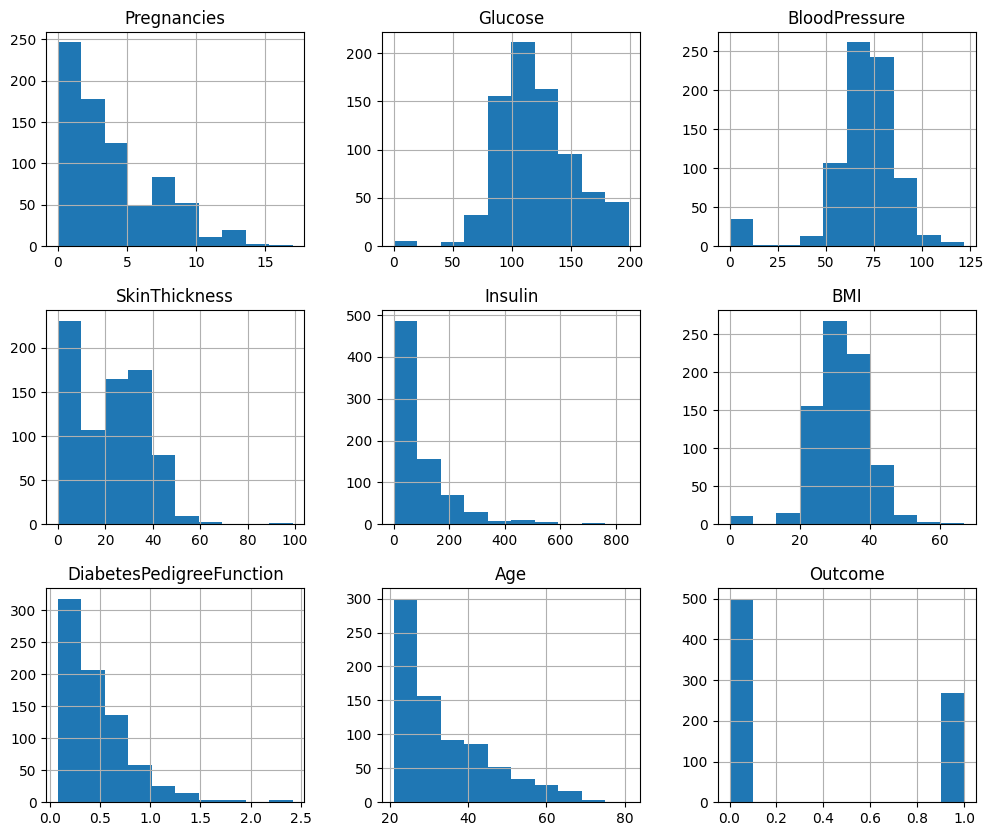

In [ ]:
df.hist(figsize=(12,10))

Pregnancies:

  * Distribuição assimétrica à direita.
  * A maioria das mulheres teve 0 a 5 gestações.
  * Valores acima de 10 são raros.

Glucose

* Distribuição próxima de uma normal assimétrica.
* Pico entre 100 e 120.
* Alguns valores próximos de zero aparecem.

BloodPressure

* Distribuição com formato de sino, mas com um número considerável de zeros.
* Pressão sanguínea nunca deveria ser zero.

SkinThickness

* Distribuição fortemente assimétrica.
* Grande número de valores igual a zero.
* Alguns valores muito elevados podem ser outliers.

Insulin

* Extremamente assimétrica (muitos valores baixos, poucos valores altos).
* Grandes quantidades de zero.
* Cauda longa até 846 µU/ml, indicando outliers muito fortes.

BMI

* Distribuição levemente normal, porém possui presença de valores igual a zero, o que é impossível para BMI.
* Maioria dos valores entre 20 e 40 (sobrepeso e obesidade), consistente com risco de diabetes.

DiabetesPedigreeFunction

* Distribuição com muitos valores baixos.
* Representa risco hereditário.

Age

* Distribuição assimétrica.
* Maioria entre 21 e 45 anos.
* Alguns casos entre 60 e 80 anos.

Outcome

* Variável alvo
* 0 (não diabético): maioria (500 ocorrências)
* 1 (diabético): minoria (268 ocorrências)

<Axes: >

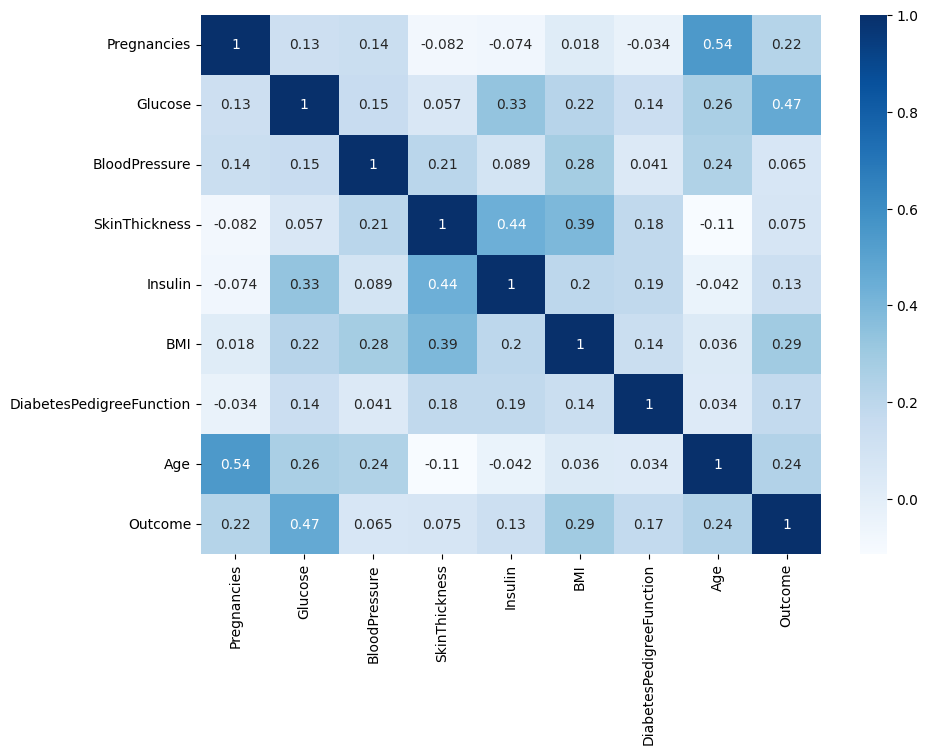

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Correlação com a variável alvo:

Os atributos mais importantes (maior correlação com Outcome)

* Glucose (0.47): A maior correlação positiva com diabetes. Níveis altos de glicose aumentam o risco de diabetes.

* BMI (0.29): Peso corporal elevado está associado à resistência à insulina. Correlação moderada e coerente.

* Age (0.24): Indica que o risco aumenta com a idade.

* Pregnancies (0.22): Mulheres com mais gestações tendem a ter maior risco de diabetes gestacional.


Correlações fracas com Outcome:

* BloodPressure (0.065)

* SkinThickness (0.075)

* Insulin (0.13)

* DiabetesPedigreeFunction (0.17)

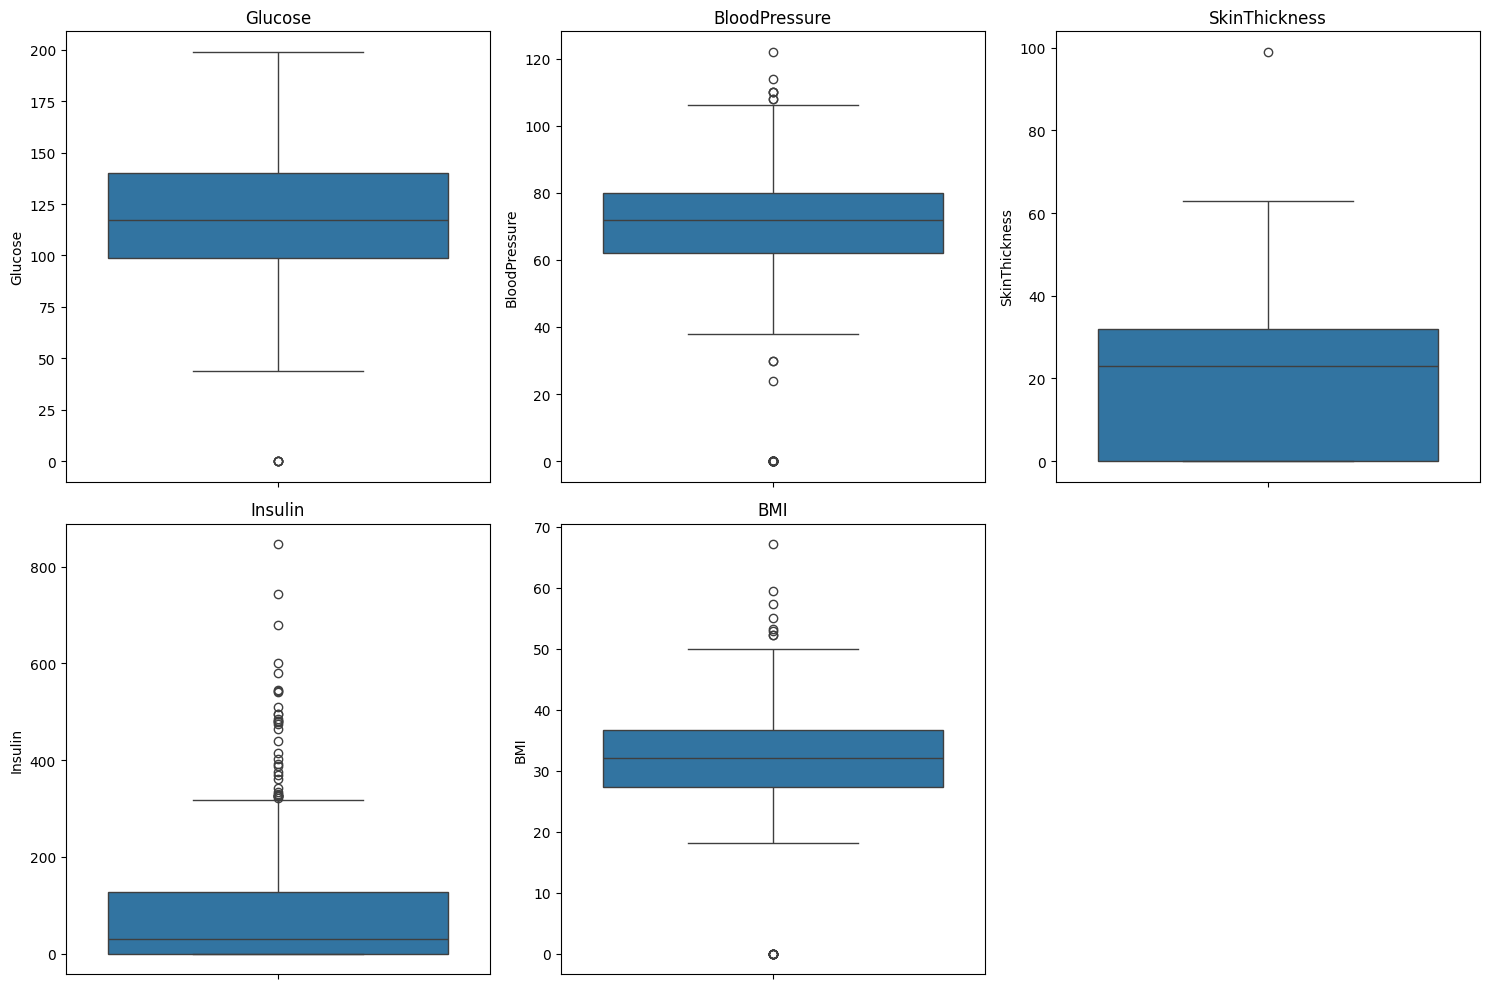

In [ ]:
plt.figure(figsize=(15, 10))
features_boxplot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i, feature in enumerate(features_boxplot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=feature)
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

Glucose
* Há um outlier extremo em 0, indicando um valor faltante (pois glicose não pode ser zero).
* A distribuição é assimétrica com vários valores acima da mediana.

BloodPressure
* Há valores 0, que são clinicamente impossíveis e representam valores faltantes.
* Outliers baixos (~20–30), provável erro de medição.

SkinThickness
* Muitos valores zeros.
* Um outlier em torno de 100.

Insulin
* A maioria dos valores está próxima de zero.
* Muitos outliers em 300–900 μU/mL.

BMI
* Alguns outliers altos (50–70).
* Um ponto 0, é impossível uma pessoa sem peso/altura.

Como trata-se de um dataset de saúde, é possível que alguns outliers sejam casos raros da medicina.

In [ ]:
# Tratamento de dados faltantes usando mediana
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_missing:
    df[col] = df[col].replace(0, np.nan)

for col in cols_with_missing:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# Normalizacao
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print(f"Formato Treino: {X_train.shape}")
print(f"Formato Teste: {X_test.shape}")

Formato Treino: (576, 8)
Formato Teste: (192, 8)


## 2. Modelos classificadores:
* 4 algoritmos single, sendo 3 white-box (Árvore de Decisão (C4.5 ou CART), Regressão Logística, PRISM) e 1 black-box (escolhido entre SVM ou Rede Neural MLP ou alguma outra abordagem com Rede Neural) e

* 2 ensemble (combinação de classificadores): Random Forest, XGBoost,

In [ ]:
# @title Prism
def discretize(df, bins=3):
    df_disc = df.copy()
    for col in df_disc.columns:
        if col != "Outcome":
            df_disc[col] = pd.qcut(df_disc[col], q=bins, duplicates="drop")
    return df_disc

class PRISM:
    def __init__(self):
        self.rules = []

    def fit(self, df, class_column="Outcome"):
        attributes = [c for c in df.columns if c != class_column]
        values = {a: df[a].unique() for a in attributes}

        classes = df[class_column].unique()

        for cls in classes:
            df_class = df[df[class_column] == cls].copy()
            df_remaining = df.copy()

            while len(df_class) > 0:
                rule = []
                current_subset = df_remaining
                used_attrs = set()

                while True:
                    best_attr = None
                    best_val = None
                    best_prob = -1
                    best_subset = None

                    for attr in attributes:
                        if attr in used_attrs:
                            continue

                        for v in values[attr]:
                            subset = current_subset[current_subset[attr] == v]
                            if subset.empty:
                                continue

                            prob = (subset[class_column] == cls).mean()

                            if prob > best_prob:
                                best_prob = prob
                                best_attr = attr
                                best_val = v
                                best_subset = subset

                    if best_attr is None:
                        break

                    rule.append((best_attr, best_val))
                    used_attrs.add(best_attr)
                    current_subset = best_subset

                    if (current_subset[class_column] == cls).all():
                        break

                self.rules.append((rule, cls))

                df_class = df_class.drop(current_subset.index, errors="ignore")
                df_remaining = df_remaining.drop(current_subset.index, errors="ignore")


    def predict_one(self, row):
        for conds, cls in self.rules:
            if all(row[attr] == val for attr, val in conds):
                return cls
        return 0

    def predict(self, X):
        return X.apply(self.predict_one, axis=1)

In [ ]:
# Cart
cart = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)
cart.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Regressao Logistica
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
# Prism
df_prism = discretize(df, bins=3)
X_prism = df_prism.drop("Outcome", axis=1)
y_prism = df_prism["Outcome"]

Xtr_p, Xte_p, ytr_p, yte_p = train_test_split(
    X_prism, y_prism, test_size=0.25, random_state=42, stratify=y_prism
)

train_p = pd.concat([Xtr_p, ytr_p], axis=1)

prism = PRISM()
prism.fit(train_p)

In [ ]:
# NLP Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(32,16),
                    activation='relu',
                    max_iter=1000,
                    random_state=42)

mlp.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

## 3. Avaliação de desempenho de cada algoritmo usado,

In [ ]:
def avaliar_modelo(nome, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n===== {nome} =====")
    print("Acurácia:", round(acc, 4))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

    return acc


===== Decision Tree (CART) =====
Acurácia: 0.6875

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       125
           1       0.57      0.43      0.49        67

    accuracy                           0.69       192
   macro avg       0.65      0.63      0.63       192
weighted avg       0.67      0.69      0.68       192



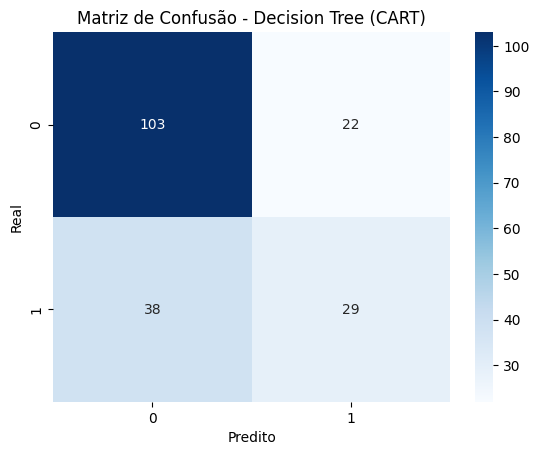

In [ ]:
# Cart
acc_cart = avaliar_modelo("Decision Tree (CART)", cart, X_test, y_test)


===== Regressão Logística =====
Acurácia: 0.724

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       125
           1       0.63      0.51      0.56        67

    accuracy                           0.72       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.72      0.72      0.72       192



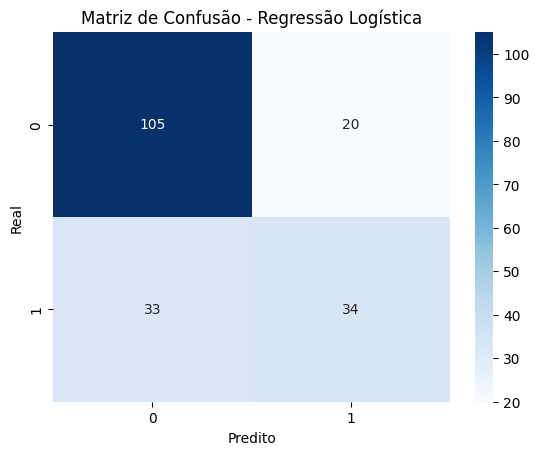

In [ ]:
# Regressao Logistica
acc_logreg = avaliar_modelo("Regressão Logística", logreg, X_test, y_test)

Acurácia: 0.7083333333333334

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       125
           1       0.63      0.39      0.48        67

    accuracy                           0.71       192
   macro avg       0.68      0.63      0.64       192
weighted avg       0.70      0.71      0.69       192


Matriz de Confusão:


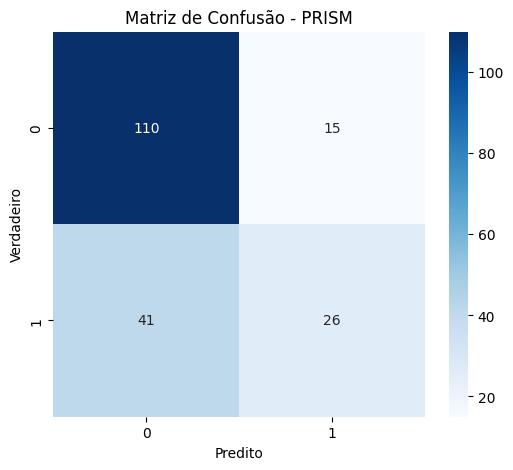

In [ ]:
# Prism
y_pred_p = prism.predict(Xte_p)
acc_prism = (y_pred_p.values == yte_p.values).mean()
print("Acurácia:", acc_prism)

print("\nRelatório de Classificação:")
print(classification_report(yte_p, y_pred_p))

cm_prism = confusion_matrix(yte_p, y_pred_p)

print("\nMatriz de Confusão:")

plt.figure(figsize=(6,5))
sns.heatmap(cm_prism, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - PRISM")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


===== MLP Neural Network =====
Acurácia: 0.724

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       125
           1       0.60      0.63      0.61        67

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.73      0.72      0.73       192



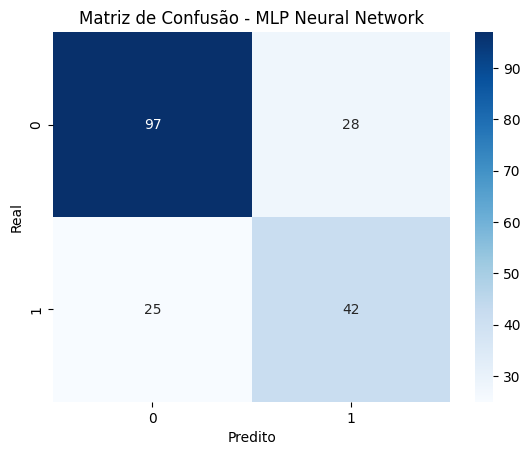

In [ ]:
# MLP Neural Network
acc_mlp = avaliar_modelo("MLP Neural Network", mlp, X_test, y_test)


===== Random Forest =====
Acurácia: 0.7396

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       125
           1       0.65      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.74      0.73       192



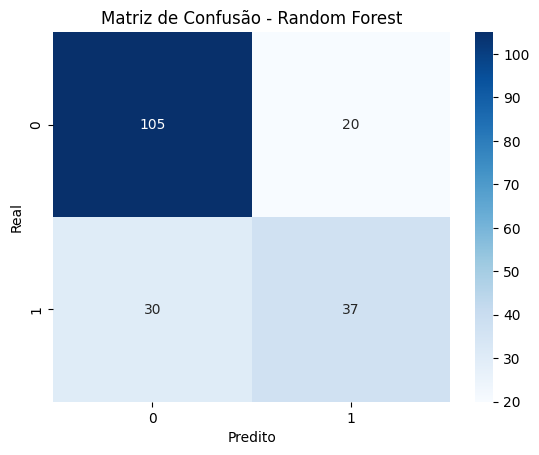

In [ ]:
# Random Forest
acc_rf = avaliar_modelo("Random Forest", rf, X_test, y_test)


===== XGBoost =====
Acurácia: 0.7292

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       125
           1       0.62      0.58      0.60        67

    accuracy                           0.73       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



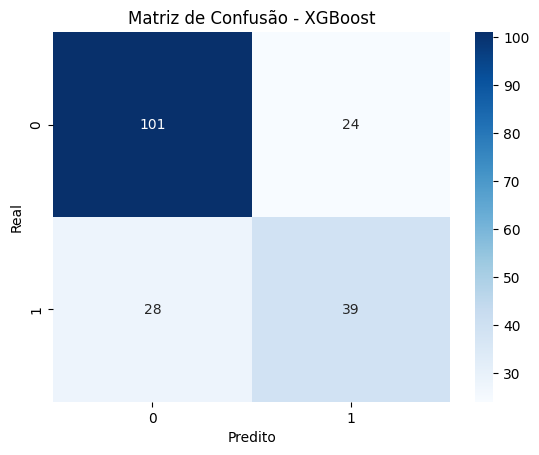

In [ ]:
# XGBoost
acc_xgb = avaliar_modelo("XGBoost", xgb_model, X_test, y_test)

## 4. Comparação entre os 2 modelos classificadores single que apresentem melhores indicadores de desempenho via acurácia ou F1-Score, pegando o melhor single e comparando com o melhor ensemble.

In [ ]:
resultados = {
    "CART": acc_cart,
    "Regressão Logística": acc_logreg,
    "PRISM": acc_prism,
    "MLP": acc_mlp,
    "Random Forest": acc_rf,
    "XGBoost": acc_xgb
}

print("\n===== Acurácias =====")
for modelo, acc in resultados.items():
    print(f"{modelo}: {round(acc, 4)}")


===== Acurácias =====
CART: 0.6875
Regressão Logística: 0.724
PRISM: 0.7083
MLP: 0.724
Random Forest: 0.7396
XGBoost: 0.7292


Os dois melhores modelos single são Regressão Logística (0.724) e MLP (0.724). Ambos empataram em desempenho por acurácia. Não há diferença estatística relevante entre eles e para decidir qual modelo single seguir adiante, é comum adotar:
* Regressão Logística para interpretabilidade
* MLP quando o foco é expressividade do modelo

Para fins de comparação com ensembles, vou usar o MLP como melhor single, já que ele representa um modelo mais robusto e não linear.

Foram avaliados dois modelos do tipo ensemble: o Random Forest e o XGBoost. Ambos são métodos baseados em classificadores combinados para melhorar o desempenho preditivo em relação a modelos individuais.

Após o treinamento e avaliação dos dois modelos, foi possível estabelecer um ranking baseado na acurácia obtida. O Random Forest apresentou acurácia de 0.7396, enquanto o XGBoost alcançou uma acurácia de 0.7292. Portanto, entre os ensembles testados, o modelo que apresentou o melhor desempenho foi o Random Forest, obtendo a maior taxa de acertos no conjunto de teste.

Portanto, entre os classificadores single, os modelos que apresentaram os melhores desempenhos foram a Regressão Logística e a Rede Neural MLP, ambos alcançando acurácia de 0.724. Esses dois modelos superaram os demais (CART e PRISM) e, portanto, foram selecionados para comparação.

Na categoria de modelos ensemble, o Random Forest atingiu a maior acurácia (0.7396), superando o XGBoost.

Ao comparar o melhor modelo single (MLP) com o melhor ensemble (Random Forest), observa-se que o ensemble apresenta desempenho superior. Esse resultado é coerente com o comportamento esperado de ensembles, que combinam múltiplos modelos base para reduzir variância e melhorar a capacidade de generalização.

Assim, conclui-se que o Random Forest é o modelo com melhor desempenho global na predição de diabetes para este projeto.

## 5. Pensando em melhoria na explicabilidade dos modelos, aplique os métodos:
(i) SHAP (SHapley Additive exPlanations) e

(ii) LIME (Local Interpretable Model-Agnostic Explanations),

na saída dos modelos (melhor single e melhor ensemble, conforme 1.4), verificando e discutindo o que agregaria de mais esclarecimento nos aspectos de explicabilidade.

In [ ]:
feature_names = X.columns.tolist()

  0%|          | 0/192 [00:00<?, ?it/s]

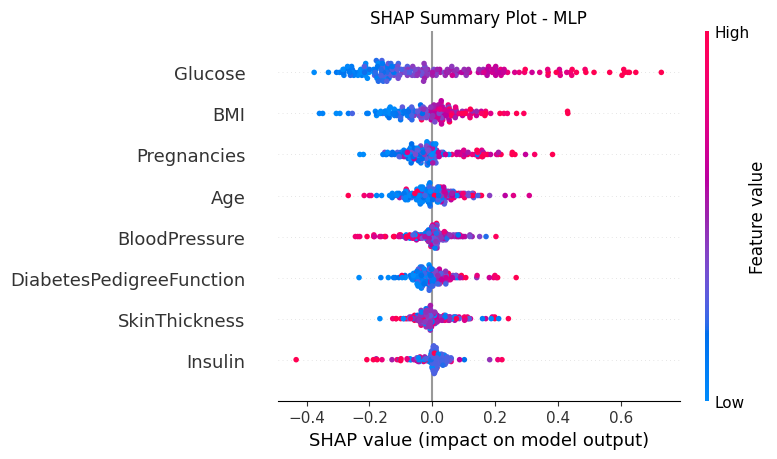

In [ ]:
# SHAP MLP
explainer_mlp = shap.KernelExplainer(mlp.predict_proba, X_train)
shap_values_mlp = explainer_mlp.shap_values(X_test)
vals_to_plot_mlp = shap_values_mlp[:, :, 1]

plt.figure()
plt.title("SHAP Summary Plot - MLP")
shap.summary_plot(vals_to_plot_mlp, X_test, feature_names=feature_names)

(192, 8)


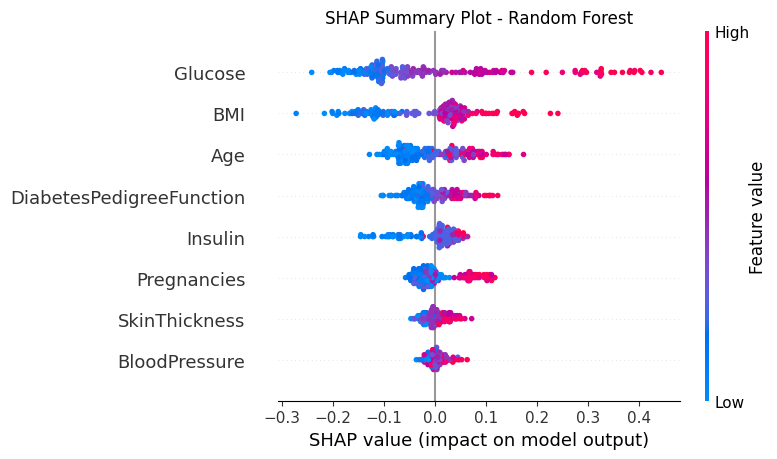

In [ ]:
# SHAP Random Forest
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)
vals_to_plot_rf = shap_values_rf[:, :, 1]
print(f"{np.shape(vals_to_plot_rf)}")

plt.figure()
plt.title("SHAP Summary Plot - Random Forest")
shap.summary_plot(vals_to_plot_rf, X_test, feature_names=feature_names)

In [ ]:
# LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification'
)

idx = 5
instance = X_test[idx]
print(f"Instância de índice {idx}. Classe Real: {y_test.iloc[idx]}")

Instância de índice 5. Classe Real: 0


In [ ]:
# LIME MLP
print("LIME - MLP:")
exp_mlp = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=mlp.predict_proba
)
print(exp_mlp.as_list())

LIME - MLP:
[('BMI <= -0.68', -0.18677157091361468), ('-0.84 < Pregnancies <= -0.25', -0.06961130093899963), ('-0.24 < Insulin <= -0.18', 0.04805867936444527), ('-0.15 < Glucose <= 0.64', 0.034227362826809986), ('BloodPressure <= -0.69', -0.03088136566674332), ('-0.79 < Age <= -0.28', -0.01559352005480092), ('-0.47 < SkinThickness <= -0.01', -0.005188123567183135), ('-0.27 < DiabetesPedigreeFunction <= 0.53', 0.0010410540663273297)]


In [ ]:
# LIME Random Forest
print("LIME - Random Forest:")
exp_rf = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=rf.predict_proba
)
print(exp_rf.as_list())

LIME - Random Forest:
[('BMI <= -0.68', -0.1734756389123123), ('-0.24 < Insulin <= -0.18', 0.04323180709374407), ('-0.79 < Age <= -0.28', -0.04181830901696651), ('-0.84 < Pregnancies <= -0.25', -0.03853247284463199), ('-0.15 < Glucose <= 0.64', -0.02432642280117233), ('BloodPressure <= -0.69', -0.020910606402100178), ('-0.47 < SkinThickness <= -0.01', -0.01626853384188338), ('-0.27 < DiabetesPedigreeFunction <= 0.53', 0.004115087458253757)]


**SHAP – Random Forest**

Features mais importantes:

* Glucose

* BMI

* Age

Essas variáveis têm maior espalhamento e maior magnitude de SHAP value.

- Glucose: Altos valores de glicose (rosa) aumentam fortemente a probabilidade de diabetes. Baixos valores (azul) reduzem a probabilidade

- BMI: Valores altos de BMI aumentam o risco (rosa à direita). Valores baixos reduzem (azul à esquerda)

- Age: Idades mais altas (rosa) possuem impacto positivo no risco. Jovens possuem menor impacto.

- Pregnancies e DiabetesPedigreeFunction: Importância intermediária. Valores altos também tendem a aumentar o risco

- Insulin, SkinThickness e BloodPressure: Baixa importância. Impacto muito pequeno no modelo

Isso pode indicar que o Random Forest não conseguiu extrair padrões fortes dessas variáveis.


**SHAP – MLP**

Comparando com o RF, a MLP mostra comportamento mais não-linear e mais disperso.

Features também incluem:

* Glucose

* BMI

* Age

* Pregnancies

Mas a ordem e sensibilidade mudam.

MLP tenta capturar relações mais complexas, combina variáveis entre si, apresenta impacto mais disperso (amplitude maior nos SHAP values).

- Glucose: Continua sendo a variável dominante. Entretanto, impacto mais forte no MLP.

- BMI: Também altamente importante. O impacto é mais variável (não-linearidade do MLP).

- Pregnancies: Tem mais importância no MLP do que no RF. Isso indica que o MLP explora correlações combinadas com idade e glucose

Logo, o MLP enxerga padrões mais complexos, é mais sensível a pequenas variações nos dados, distribui importância entre mais features, mas pode ser menos interpretável.

**MLP**

Principais fatores que diminuem a probabilidade de diabetes:

- BMI <= -0.68 → -0.175

- Pregnancies entre (-0.84 e -0.25)

- BloodPressure baixo

- SkinThickness baixo

Principais fatores que aumentam:

- Insulin moderado

- Age (moderada)

- Glucose moderada

- DiabetesPedigreeFunction moderada

**RF**

O RF gera praticamente a mesma lógica local do MLP, mas com intensidade menor.

A mesma instância 5 é classificada como não diabética, pois:

- Baixo BMI

- Poucas gestações

- Idade não muito alta

- Pouca espessura de pele

Todos esses fatores empurram o SHAP value/local LIME para o lado negativo (classe 0).

Logo,

RF e MLP concordam

RF apresenta explicações mais suaves

MLP mostra maior instabilidade local

A aplicação combinada de SHAP e LIME permitiu compreender tanto o comportamento global quanto as decisões locais dos modelos.
O SHAP mostrou que Glucose, BMI e Age são consistentemente as variáveis mais relevantes em ambos os modelos, embora o MLP atribua maior sensibilidade a Pregnancies e apresente padrões mais não-lineares.
Já o LIME revelou que, para instâncias individuais, ambos os modelos baseiam suas decisões principalmente em níveis de glicose, índice de massa corporal e número de gestações, com explicações locais alinhadas.
Assim, o Random Forest mostrou-se mais interpretável globalmente, enquanto o MLP capturou relações mais complexas, porém com maior variabilidade explicativa.

## Obs.:

(1) Em cada uma das etapas mencionadas, recomendamos, como apoio, atenção ao conteúdo do livro e ao que foi discutido no desenvolvimento da disciplina.

(2) O problema a ser resolvido, sendo diferente dos indicados, poderia ser proposto pela equipe,
mas precisa ser aprovado pelos professores da disciplina.